Выбрать две тестовые функции оптимизации

Выбранные функции:

f(x, y) = x^2 + y^2 - функция сферы

f(x, y) = (x + 2y -7)^2 + (2x + y - 5)^2 - функция Бута

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#sphere
def sphere(x, y):
    return x ** 2 + y ** 2

def grad_sphere(x, y):
    dx = 2 * x
    dy = 2 * y
    return np.array([dx, dy])

#Booth
def booth(x, y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

def grad_booth(x, y):
    dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return np.array([dx, dy])

#limitation
x_min = -10.0
x_max = 10.0
y_min = -10.0
y_max = 10.0

Сделать собственную реализацию классического градиентного спуска по заданным функциям 

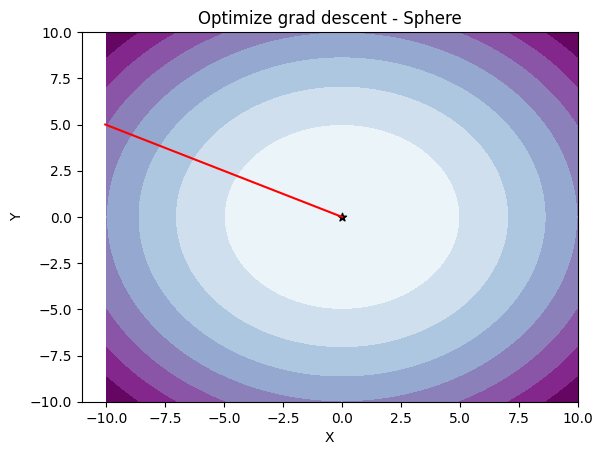

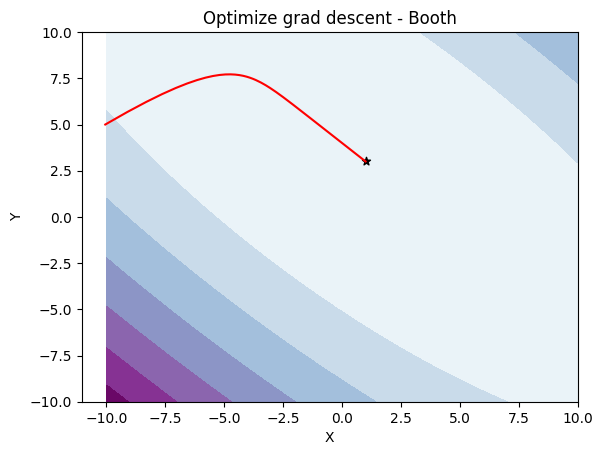

In [31]:
#def
first_point = np.array([-10.05, 5.0])
func = [sphere, booth]
grad_func = [grad_sphere, grad_booth]
func_name = ['Sphere', 'Booth']

#grad descent
def grad_desc(func, grad_func, first_point, learning_rate = 0.01, max_iterations = 1000, tolerance = 1e-6):
    path = [first_point]
    x, y = first_point

    for _ in range(max_iterations):
        grad = grad_func(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path), func(x, y)

#visual 
for func, grad_func, name in zip(func, grad_func, func_name):
    path, finish_value = grad_desc(func, grad_func, first_point)

    x = np.linspace(x_min, x_max, 400)
    y = np.linspace(y_min, y_max, 400)
    x1, y1 = np.meshgrid(x, y)
    z = func(x1, y1)

    plt.figure()
    plt.title(f'Optimize grad descent - {name}')
    plt.contourf(x1, y1, z, cmap = 'BuPu')
    plt.plot(path[:, 0], path[:, 1], color = 'red')
    plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Создать пайплайн тестирования алгоритма отпимизации

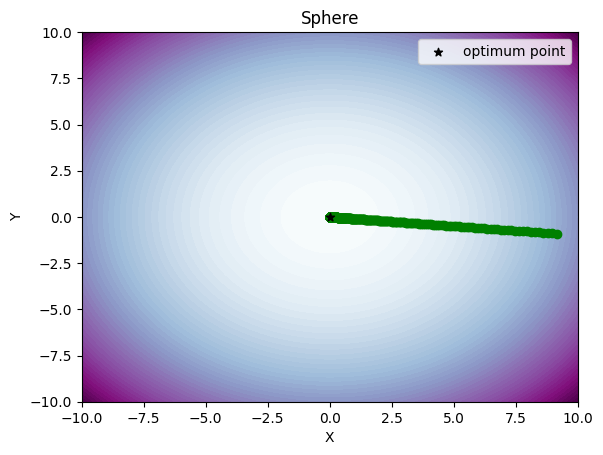

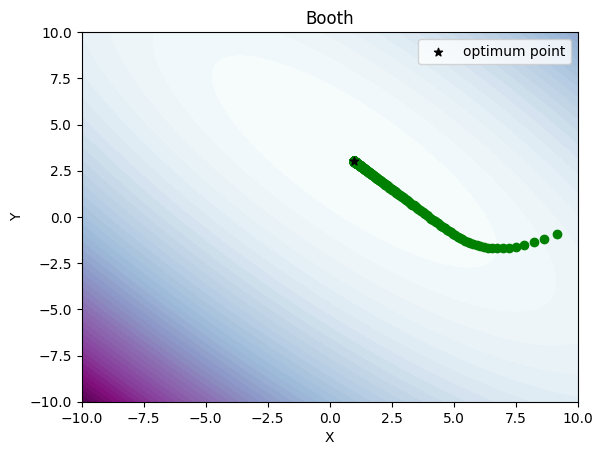

In [32]:
from matplotlib.animation import FuncAnimation

#visual graf and video rec
def visual_path(path, func, title):
    x = np.linspace(x_min, x_max, 400)
    y = np.linspace(y_min, y_max, 400)
    x1, y1 = np.meshgrid(x, y)
    z = func(x1, y1)

    fig, ax = plt.subplots()
    contour = ax.contourf(x1, y1, z, cmap = 'BuPu', levels = 50)
    scatter = ax.scatter([], [], color = 'green')
    optimum = ax.scatter([], [], marker = '*', color = 'black', label = 'optimum point')

    def upd(frame):
        scatter.set_offsets(path[: frame, :])
        optimum.set_offsets(path[frame - 1: frame, :])
    
    vis = FuncAnimation(fig, upd, frames = len(path), blit = False)
    vis_name = title + '.mp4'
    vis.save(vis_name, fps = 5, extra_args= ['-vcodec', 'libx264'])
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

#vis sphere & Booth func
def test_pipe():
    learning_rate = 0.01
    max_iterations = 1000

    first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)

    history_sphere, point = grad_desc(sphere, grad_sphere, first_point, learning_rate, max_iterations)
    visual_path(history_sphere, sphere, 'Sphere')

    history_booth, point = grad_desc(booth, grad_booth, first_point, learning_rate, max_iterations)
    visual_path(history_booth, booth, 'Booth')

test_pipe()   

Вычислим погрешности найденного решения в сравнении с аналитическим при нескольких запусках

In [33]:
#visual func 3d graf & error
def visual_optimize_3d(history_x, history_y, history_z, func, title, error, ax):
    x = np.linspace(x_min, x_max, 100)
    y = np.linspace(y_min, y_max, 100)
    x, y = np.meshgrid(x, y)
    z = func(x, y)

    ax.plot_surface(x, y, z, cmap = 'BuPu', alpha=0.8)
    ax.scatter(history_x, history_y, history_z, color = 'red', s = 30)
    ax.scatter(history_x[-1], history_y[-1], history_z[-1], color='green', marker='s')

    #deg graf
    ax.view_init(70, -60)#, -45)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'{title}\nError: {error:.10f}')

def test_pipe(func, grad_func, learning_rate = 0.01, max_iterations = 1000, tolerance = 1e-6):
    errors = []
    num_plots = 3
    num_rows = 1
    num_cols = 3

    fig = plt.figure(figsize = (15, 20))

    for i in range(num_plots):
        first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
        history, optimal_point = grad_desc(func, grad_func, first_point, learning_rate, max_iterations, tolerance)

        error = np.linalg.norm(optimal_point)
        errors.append(error)

        row_idx = i // num_cols
        col_idx = i % num_cols

        ax = plt.subplot2grid((num_rows, num_cols), (row_idx, col_idx), projection='3d')
        visual_optimize_3d([point[0] for point in history],
                                  [point[1] for point in history],
                                  [func(point[0], point[1]) for point in history],
                                  func, f'ans {i + 1}', error, ax)

    plt.tight_layout()
    plt.show()

Вычислим погрешность для сферы

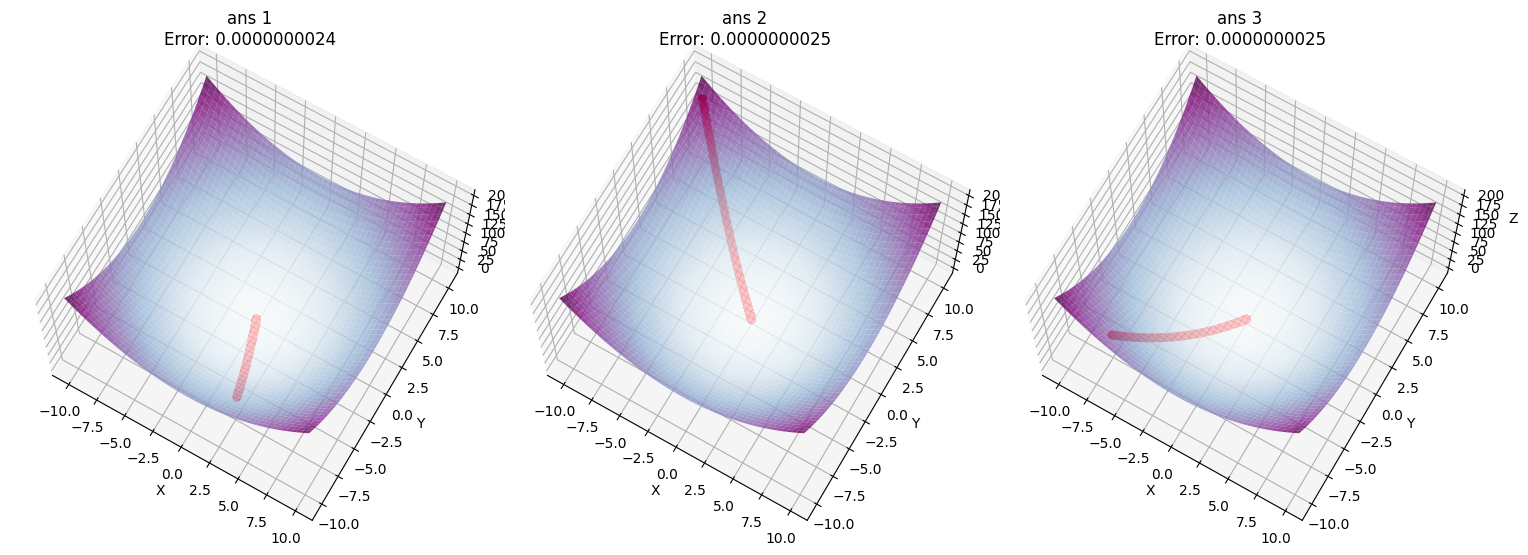

In [34]:
test_pipe(sphere, grad_sphere)

Вычислить погрешность для функции Бута:

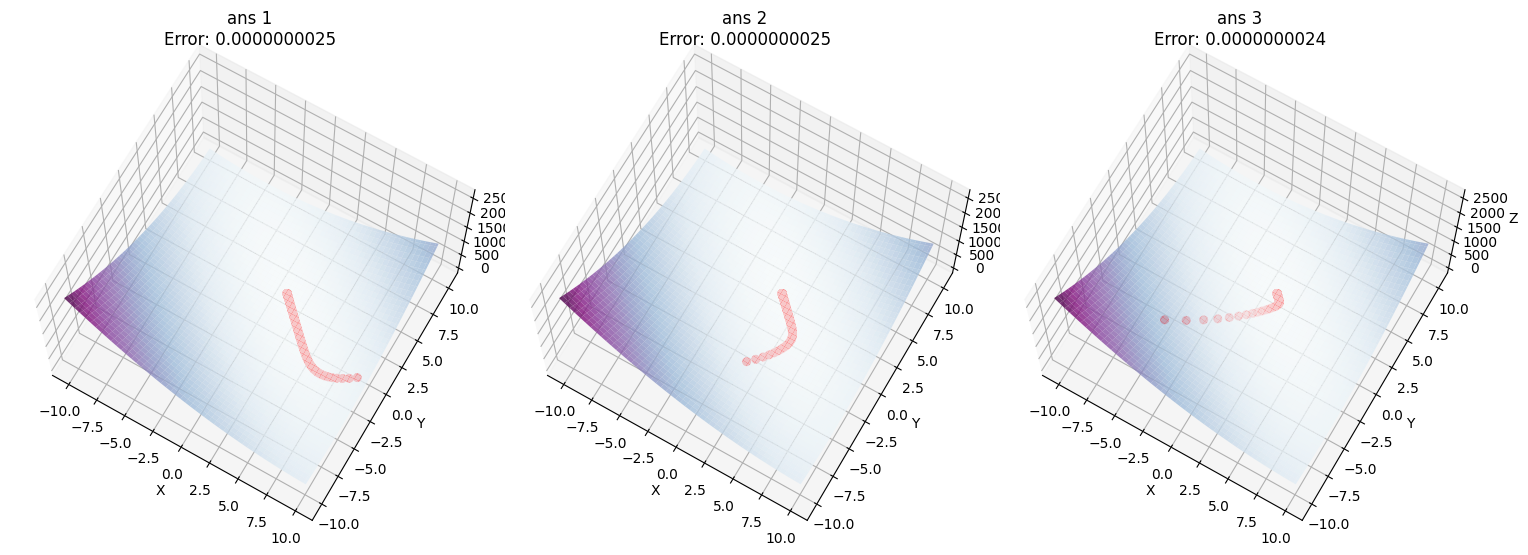

In [35]:
test_pipe(booth, grad_booth)

Визуализация точки найденного решения

In [36]:
# .mp4 open through path
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""""")

Анимация для сферы:

In [37]:
show_video('I:\Git\MAI_ML_23_Baklashkin\Sphere.mp4')

Анимация для Бута:

In [38]:
show_video('I:\Git\MAI_ML_23_Baklashkin\Booth.mp4')

Напишем метод вычисления градиента

Передача функции градиента от пользователя

In [40]:
# sphere func
def user_grad_sphere(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return df_dx, df_dy

x_val = float(input("x: "))
y_val = float(input("y: "))
user_grad = user_grad_sphere(x_val, y_val)
print(f"Sphere func grad at point ({x_val}, {y_val}): {user_grad}")

Sphere func grad at point (0.0, 0.0): (0.0, 0.0)


In [41]:
# Booth func
def user_grad_booth(x, y):
    df_dx = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    df_dy = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return df_dx, df_dy

x_val = float(input("x: "))
y_val = float(input("y: "))
user_grad = user_grad_booth(x_val, y_val)
print(f"Booth grad func at point ({x_val}, {y_val}): {user_grad}")

Booth grad func at point (1.0, 3.0): (0.0, 0.0)


Символбное вычисление градиента (sympy)

Sphere

In [42]:
import sympy as sp

x, y = sp.symbols('x y')
sympy_sphere = x ** 2 + y ** 2

sympy_grad = [sp.diff(sympy_sphere, var) for var in (x, y)]

sympy_grad_func = sp.lambdify((x, y), sympy_grad, 'numpy')

x_val = 0.0
y_val = 0.0
sympy_grad_res = sympy_grad_func(x_val, y_val)
print(f"Symbol func grad sphere at ({x_val}, {y_val}): {sympy_grad_res}")

Symbol func grad sphere at (0.0, 0.0): [0.0, 0.0]


Booth

In [43]:
x, y = sp.symbols('x y')
sympy_booth = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

sympy_grad = [sp.diff(sympy_booth, var) for var in (x, y)]

sympy_grad_func = sp.lambdify((x, y), sympy_grad, 'numpy')

x_val = 1.0
y_val = 3.0
sympy_grad_res = sympy_grad_func(x_val, y_val)
print(f"Symbol func grad Booth at ({x_val}, {y_val}): {sympy_grad_res}")

Symbol func grad Booth at (1.0, 3.0): [0.0, 0.0]


Численная аппроксимация градиента

In [44]:
def approx_grad(function, x, y, epsilon=1e-10):
    df_dx = (function(x + epsilon, y) - function(x - epsilon, y)) / (2 * epsilon)
    df_dy = (function(x, y + epsilon) - function(x, y - epsilon)) / (2 * epsilon)
    return df_dx, df_dy

x_val = 0.0
y_val = 0.0
approx_grad_res = approx_grad(sphere, x_val, y_val)
print(f"Numeric approx of sphere func grad at ({x_val}, {y_val}): {approx_grad_res}")

x_val = 1.0
y_val = 3.0
approx_grad_res = approx_grad(booth, x_val, y_val)
print(f"Numeric approx of Booth func grad at ({x_val}, {y_val}): {approx_grad_res}")

Numeric approx of sphere func grad at (0.0, 0.0): (0.0, 0.0)
Numeric approx of Booth func grad at (1.0, 3.0): (0.0, 0.0)


Создать одну моментную модификацию и протестировать ее

Метод моментов:

In [45]:
def grad_mod1(func, grad_func, first_point, learning_rate = 0.01, momentum = 0.9, max_iterations = 1000, tolerance = 1e-6):
    path = [first_point]
    x, y = first_point
    velocity = np.zeros_like(first_point)

    for _ in range(max_iterations):
        grad = grad_func(x, y)
        velocity = momentum * velocity + learning_rate * grad
        new_x, new_y = np.array([x, y]) - velocity
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Моментная модификация для сферы:

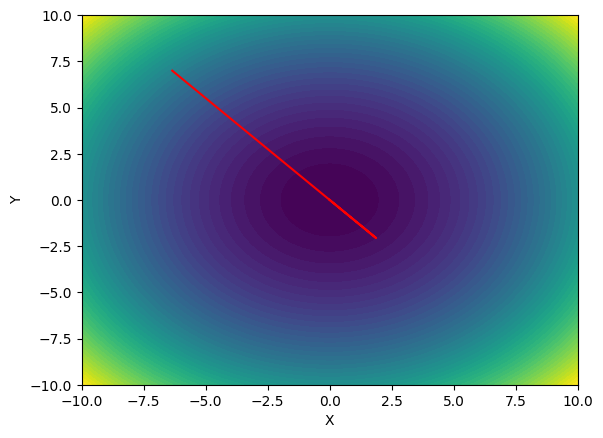

In [51]:
first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_sphere_mod1 = grad_mod1(sphere, grad_sphere, first_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
x1, y1 = np.meshgrid(x, y)
z_sphere = sphere(x1, y1)

plt.figure()
plt.contourf(x1, y1, z_sphere, cmap='viridis', levels=50)
plt.plot(path_sphere_mod1[:, 0], path_sphere_mod1[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
     

Моментная модификация для функции Бута:

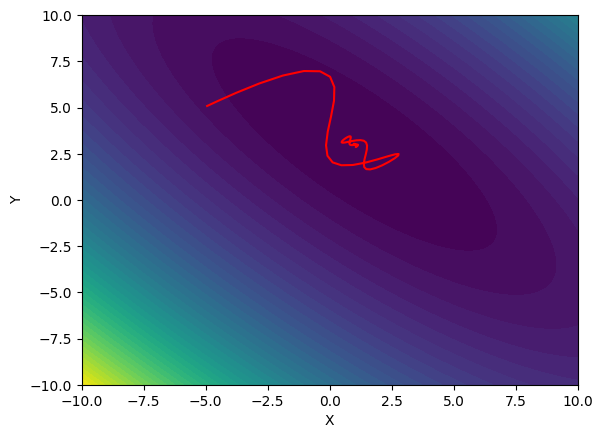

In [50]:
first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_booth_mod1 = grad_mod1(booth, grad_booth, first_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x, y)
Z_booth = booth(X, Y)

plt.figure()
plt.contourf(X, Y, Z_booth, cmap='viridis', levels=50)
plt.plot(path_booth_mod1[:, 0], path_booth_mod1[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Сделать одну адаптивную модификацию и протестировать ее

Adagrad

In [52]:
def grad_mod2(func, grad_func, first_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    path = [first_point]
    x, y = first_point
    G = np.zeros_like(first_point)

    for _ in range(max_iterations):
        grad = grad_func(x, y)
        G += grad ** 2
        adjusted_learning_rate = learning_rate / np.sqrt(G + 1e-8)

        new_x, new_y = np.array([x, y]) - adjusted_learning_rate * grad
        path.append((new_x, new_y))

        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Адаптивная модификация для сферы:

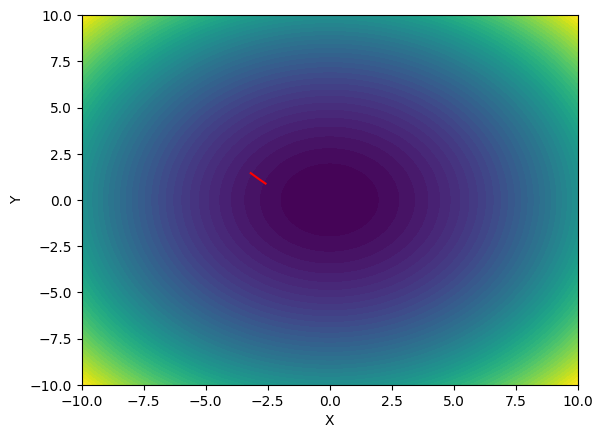

In [53]:
first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_sphere_mod2 = grad_mod2(sphere, grad_sphere, first_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
x1, y1 = np.meshgrid(x, y)
z_sphere = sphere(x1, y1)

plt.figure()
plt.contourf(x1, y1, z_sphere, cmap='viridis', levels=50)
plt.plot(path_sphere_mod2[:, 0], path_sphere_mod2[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Адаптивная модификация для функции Бута:

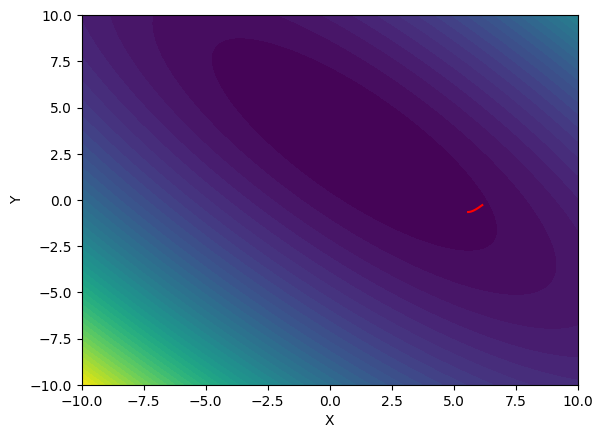

In [69]:
first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_booth_mod2 = grad_mod2(booth, grad_booth, first_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
x1, y1 = np.meshgrid(x, y)
z_booth = booth(x1, y1)

plt.figure()
plt.contourf(x1, y1, z_booth, cmap='viridis', levels=50)
plt.plot(path_booth_mod2[:, 0], path_booth_mod2[:, 1], color='red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

Был выбран метод эволюции темпа обучения

In [72]:
def grad_mod3(func, grad_func, first_point, learning_rate = 0.01, max_iterations = 1500, tolerance = 1e-6, improvement_threshold = 0.1):
    path = [first_point]
    x, y = first_point
    learning_rate = learning_rate
    best_value = float('inf')

    for _ in range(max_iterations):
        grad = grad_func(x, y)
        new_x, new_y = np.array([x, y]) - learning_rate * grad
        new_value = func(new_x, new_y)

        if new_value < best_value - tolerance * improvement_threshold:
            best_value = new_value
        else:
            learning_rate /= 2

        path.append((new_x, new_y))
        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Метод эволюции темпа обучения для сферы:

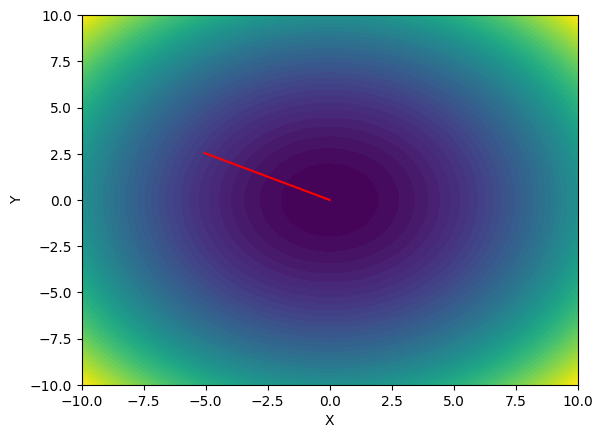

In [73]:
first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_sphere_mod3 = grad_mod3(sphere, grad_sphere, first_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
x1, y1 = np.meshgrid(x, y)
z_sphere = sphere(x1, y1)

plt.figure()
plt.contourf(x1, y1, z_sphere, cmap = 'viridis', levels = 50)
plt.plot(path_sphere_mod3[:, 0], path_sphere_mod3[:, 1], color = 'red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Метод эволюции темпа обучения для функции Бута:

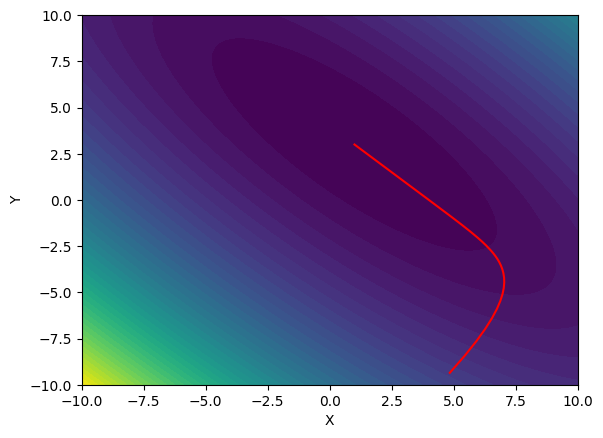

In [74]:
first_point = np.random.uniform(x_min, x_max), np.random.uniform(y_min, y_max)
path_booth_mod3 = grad_mod3(booth, grad_booth, first_point)

x = np.linspace(x_min, x_max, 400)
y = np.linspace(y_min, y_max, 400)
x1, y1 = np.meshgrid(x, y)
z_booth = booth(x1, y1)

plt.figure()
plt.contourf(x1, y1, z_booth, cmap = 'viridis', levels = 50)
plt.plot(path_booth_mod3[:, 0], path_booth_mod3[:, 1], color = 'red')
#plt.scatter(path[-1, 0], path[-1, 1], marker = "*", color = 'black')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()